In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

In [39]:
# Read pooled data
behAll = pd.read_csv('/mnt/projects/7TPD/bids/derivatives/fMRI_DA/data_BehModel/originalfMRIbehFiles/AllBehData/behAll.csv')
# Rename some columns label and entities
behAll = behAll.rename(columns={'wonAmount                ':'wonAmount'})

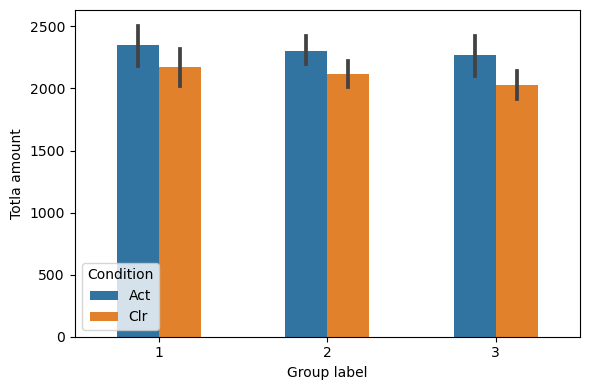

<Figure size 640x480 with 0 Axes>

In [42]:
# Plot of won amount for each group
fig = plt.figure(figsize=(6, 4), tight_layout = True)
# accumulated won ammount for each participant, block and group label
behAll_wonAmount = behAll.groupby(['group', 'block', 'sub_ID'], as_index=False)['wonAmount'].sum()
# We have two session1 and 2 for helathy control, so we should divide it by 2 to match with On and OFF medication
behAll_wonAmount.loc[behAll_wonAmount['group']==2,'wonAmount'] = behAll_wonAmount[behAll_wonAmount['group']==2]['wonAmount']/2
ax = sns.barplot(data = behAll_wonAmount, x='group', y='wonAmount', hue='block', width=.5)
# Change the label of legend
new_title = 'Condition'
ax.legend_.set_title(new_title)
for t, l in zip(ax.legend_.texts, ['Act', 'Clr']):
    t.set_text(l)
plt.ylabel('Totla amount')
plt.xlabel('Group label')
plt.show(g)
plt.savefig('../figures/accumulated_amount.png', dpi=300)

In [45]:
print(behAll_wonAmount.groupby(['group', 'block'])['wonAmount'].mean())

group  block
1      Act      2351.409091
       Stim     2171.000000
2      Act      2304.354167
       Stim     2112.895833
3      Act      2269.727273
       Stim     2024.227273
Name: wonAmount, dtype: float64


In [270]:
print(behAll_wonAmount.groupby(['group', 'block'])['wonAmount'].std())

group  block
1      Act      394.042741
       Stim     366.373216
2      Act      297.748562
       Stim     280.532722
3      Act      385.875650
       Stim     276.347768
Name: wonAmount                , dtype: float64

In [46]:
stats.ttest_rel(behAll_wonAmount[behAll_wonAmount['group']==3]['wonAmount'],
behAll_wonAmount[behAll_wonAmount['group']==1]['wonAmount'])

TtestResult(statistic=-1.7123038538082895, pvalue=0.09404454621622002, df=43)